# **Open Circuit Potential (OCP) Balancing**

This notebook is created to provide an example of using PyBaMM-param package when balancing OCP curve with shifting and stretching the fitted curve to experimental data. This can also be found in `scripts/ocp_balance.py` as Python function.

In [1]:
#%pip install git+https://github.com/paramm-team/pybamm-param.git -q
import pbparam
import pandas as pd
import os

os.chdir(os.path.join(pbparam.__path__[0], "input", "data"))

We have 4 different files in this example. 2 for half-cell and 2 for three-electrode full cell. They are divided for their lithiation and delithiation stage.

In [2]:
#  .csv files are uploaded
anode_half_lit = pd.read_csv(os.path.join("anode_OCP_2_lit.csv"))
anode_half_delit = pd.read_csv(os.path.join("anode_OCP_2_delit.csv"))
anode_three_lit = pd.read_csv(os.path.join("anode_OCP_3_lit.csv"))
anode_three_delit = pd.read_csv(os.path.join("anode_OCP_3_delit.csv"))

In [3]:
#  .csv files are uploaded
cathode_half_lit = pd.read_csv(os.path.join("cathode_OCP_2_lit.csv"))
cathode_half_delit = pd.read_csv(os.path.join("cathode_OCP_2_delit.csv"))
cathode_three_lit = pd.read_csv(os.path.join("cathode_OCP_3_lit.csv"))
cathode_three_delit = pd.read_csv(os.path.join("cathode_OCP_3_delit.csv"))

Then, optimisation problem should be passed to pbparam with the data to be used as below. Cost function (default=pbparam.RMSE()) and weights (default=[1,1]) are optional arguments. Weights can be defined as single value list or same lengt with data.

In [4]:
ocp_balance = pbparam.OCPBalance(
    [cathode_half_lit, cathode_half_delit],
    [cathode_three_lit, cathode_three_delit],
    
    #cost_function=pbparam.MLE(),
    #weights=[2],
)

/Users/muhammedsogut/Documents/GitHub/pybamm-param/pbparam/optimisation_problems/OCP_balance.py:59: RuntimeWarning: Mean of empty slice
  self.weights = [1 / np.nanmean(valid_data_ref)] * len(data_ref)


Optimiser to minimise cost function should be selected in the nest step as below.

In [5]:
optimiser = pbparam.ScipyMinimize(method="Nelder-Mead")

```optimiser.optimise(optimisation_problem)``` should be used to run minimasiation algorithm.

In [6]:
result = optimiser.optimise(ocp_balance)

/Users/muhammedsogut/Documents/GitHub/pybamm-param/pbparam/cost_functions/rmse.py:64: RuntimeWarning: Mean of empty slice
  rmse += np.sqrt(np.nanmean(err**2))


shift and stretch values and final cost function value can be printed as below.

In [7]:
print(result)


             Optimal values: [-0.4658417  1.4658417]
        Cost function value: nan
                 Solve time: 144.538 ms
                    Message: Maximum number of function evaluations has been exceeded.
        


PyBaMM-param has built in plot function to represent results.

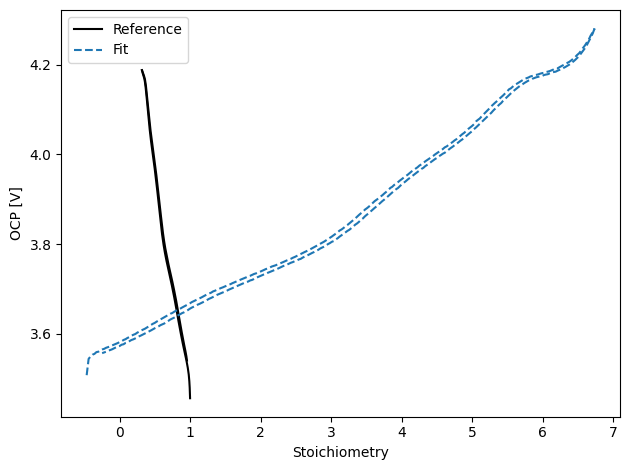

In [8]:
result.plot();